In [241]:
import pandas as pd

In [242]:
import mysql.connector as connector

conn = connector.connect(host="localhost", user="root", password="123", database="project")
df_item = pd.read_sql("SELECT * FROM item", conn)
df_price = pd.read_sql("SELECT * FROM price", conn)

In [366]:
df_item['item'].value_counts()

Weed                         3338
Drugs                        2194
Benzos                       1193
Books                         955
Cannabis                      877
Hash                          820
Cocaine                       630
Pills                         473
Money                         405
MDMA                          393
Erotica                       385
Steroids, PEDs                376
Heroin                        370
DMT                           343
Opioids                       342
Digital goods                 260
Meth                          259
Speed                         246
Magazines                     240
Services                      220
Cubensis                      218
LSD                           205
Ketamine                      195
Custom Orders                 192
2C-B                          186
CDs, DVDs, software, etc.     165
Concentrates                  156
White                         137
Viagra                        134
Methylone     

In [244]:
df_category = pd.read_csv('categories.csv')
df_category[df_category['category'] == '22']
df_category['category'] = df_category['category'].str.replace(',',"")
df_category['category'] = df_category['category'].str.replace(' ',"")
df_category['category'] = df_category['category'].astype(str).astype(int)

In [245]:
df_category.dtypes

category     int64
item        object
dtype: object

In [246]:
df_category[df_category.category==122]

,category,item
29,122,Books


In [247]:
df_item = df_item.merge(df_category, on='category', how = 'left')
df_item.head()

,item_id,seller,ships_to,ships_from,category,first_seen,last_seen,item
0,35dfed5574,6a331d36c0,Worldwide,undeclared,122,1328245275,1343111718,Books
1,22ab382305,6a331d36c0,Worldwide,undeclared,122,1328242190,1343120230,Books
2,857c681b0b,6a331d36c0,Worldwide,undeclared,122,1328242190,1343111924,Books
3,968793674a,b19ad045c2,Worldwide,Canada,70,1328241659,1331004817,Drugs
4,afce2bc194,b19ad045c2,Worldwide,Canada,92,1328239771,1331004806,NaN


In [369]:
df_item['ships_to'].value_counts(normalize=True)

Worldwide                                     0.494525
United States of America                      0.292516
European Union                                0.041378
USA and Canada                                0.041173
United Kingdom                                0.036375
Australia                                     0.023785
EU, USA, and Canada                           0.015091
Worldwide except USA                          0.013902
Germany                                       0.010293
EU, CH, and NO                                0.005208
Australia and New Zeland                      0.004880
Canada                                        0.003609
undeclared                                    0.002625
EU except Italy                               0.002420
Sweden                                        0.001599
Finland                                       0.001189
US                                            0.000902
Anywhere                                      0.000820
worldwide 

In [248]:
df_item[df_item['item'] == 'Benzos']['ships_from'].value_counts()

United States of America    540
United Kingdom              193
undeclared                  135
India                        85
Germany                      82
Canada                       20
Australia                    19
Sweden                       16
Italy                        13
Bosnia and Herzegovina       12
Netherlands                  11
Austria                      11
Thailand                     10
Belgium                       9
Finland                       7
China                         7
Norway                        6
Spain                         6
Cambodia                      4
France                        4
Denmark                       2
Czech Republic                1
Name: ships_from, dtype: int64

In [249]:
df_item.to_csv('item_csv.csv')

In [250]:
%matplotlib inline
items = df_item['item'].value_counts().to_frame(name=None)
#items.head(10).plot(kind = 'bar')
#items.iplot(kind='bubble')
items.to_csv('items_csv.csv')

In [251]:
#object
#time duration
#country flow


In [252]:
items

,item
Weed,3338
Drugs,2194
Benzos,1193
Books,955
Cannabis,877
Hash,820
Cocaine,630
Pills,473
Money,405
MDMA,393


In [253]:
df_price['item_id'].unique()

array(['35dfed5574', '22ab382305', '857c681b0b', ..., '61a725e285',
       '97480c5de9', '4280232807'], dtype=object)

In [254]:
df_unique_price = df_price.drop_duplicates(subset='item_id', keep='first').reset_index()
df_unique_price

,index,item_id,price,time
0,0,35dfed5574,0.10,1.328245e+09
1,2,22ab382305,0.10,1.328242e+09
2,3,857c681b0b,0.16,1.328242e+09
3,4,968793674a,1.41,1.328242e+09
4,5,afce2bc194,2.40,1.328240e+09
5,6,4ca5cfcf72,12.85,1.328242e+09
6,7,66217ab06b,7.55,1.328241e+09
7,10,c4f4bb01c2,0.10,1.328242e+09
8,12,6ff9e8ebff,0.10,1.328245e+09
9,14,3e2eb4e595,0.10,1.328242e+09


In [255]:
import datetime

first_seen_date = []
for x in df_item['first_seen']:
    first_seen_date.append(datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

df_item['first_seen_date'] = first_seen_date

In [256]:
last_seen_date = []
for x in df_item['last_seen']:
    last_seen_date.append(datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

df_item['last_seen_date'] = last_seen_date

In [280]:
df_item2 = df_item[['item_id','seller','item']]
df_item3 = df_item2.groupby('seller')['item_id'].value_counts().reset_index(level=0)
df_item3.rename(columns={'item_id': 'number'},inplace=True)
df_item3 = df_item3.reset_index()
df_item3 = df_item3.merge(df_unique_price, how='left', on='item_id')
df_item3['money'] = df_item3['price']*df_item3['number']
df_item4 = df_item3.groupby('seller')['money'].sum().reset_index()
df_item4['money'] = df_item4['money'].astype(int)
df_item4.sort_values(by='money',ascending=False).to_csv('money.csv')

In [283]:
df_item4.head()#[df_item3['seller']=='1e0f977b89']

,seller,money
0,001db1aca5,1713
1,006fc2dbdd,1214
2,00a9f4a864,25
3,00d18e6a74,16
4,00ee5d98dc,320


In [259]:
df_item_final = df_item4.sort_values(by='money',ascending=False)
df_item_final

,seller,money
1172,f1b4a51172,100000390
980,ca492f913f,15450623
169,1e0f977b89,182563
625,82492037c6,116220
248,2cc262d8e0,82560
41,06b8d7df42,38786
1008,d10a9075db,31448
748,9dbb23bc56,25964
624,82466b59a4,24846
938,c02b16acb1,22507


In [260]:
df_item4[df_item4['money'] > 1000000].reset_index()

,index,seller,money
0,980,ca492f913f,15450623
1,1172,f1b4a51172,100000390


In [261]:
#df_item3[df_item3['seller']=='f1b4a51172']
df_item3

,item_id,seller,number,index,price,time,money
0,071ece0fc4,001db1aca5,1,148631.0,215.09,1.331891e+09,215.09
1,07aa03b1e4,001db1aca5,1,147381.0,64.74,1.331892e+09,64.74
2,0a6c01f9b1,001db1aca5,1,146477.0,12.42,1.331891e+09,12.42
3,16e9e8fa89,001db1aca5,1,276699.0,211.51,1.334641e+09,211.51
4,1f76876b21,001db1aca5,1,145634.0,60.85,1.331891e+09,60.85
5,26404364ea,001db1aca5,1,146182.0,60.85,1.331891e+09,60.85
6,39348e2bd8,001db1aca5,1,147912.0,64.74,1.331891e+09,64.74
7,3b38d0dd41,001db1aca5,1,145186.0,12.42,1.331891e+09,12.42
8,636b4bf753,001db1aca5,1,241619.0,13.08,1.333416e+09,13.08
9,6c454690e7,001db1aca5,1,146311.0,64.74,1.331891e+09,64.74


In [262]:
df_item4

,seller,money
0,001db1aca5,1713
1,006fc2dbdd,1214
2,00a9f4a864,25
3,00d18e6a74,16
4,00ee5d98dc,320
5,00ee755a79,163
6,0138110713,62
7,013c9c29d8,15
8,01611b6cf9,76
9,01700ae4ca,2


In [263]:
df_item4[(df_item4['money'] > 100000) & (df_item4['money'] < 1000000)].reset_index()

,index,seller,money
0,169,1e0f977b89,182563
1,625,82492037c6,116220


In [264]:
df_item4[(df_item4['money'] > 10000) & (df_item4['money'] < 100000)].reset_index()

,index,seller,money
0,41,06b8d7df42,38786
1,137,17fd5d25cb,11527
2,248,2cc262d8e0,82560
3,581,7824adf783,10398
4,601,7c1ca8ce36,13463
5,619,810eb858ad,19070
6,624,82466b59a4,24846
7,748,9dbb23bc56,25964
8,938,c02b16acb1,22507
9,973,c8e9684fff,11371


In [265]:
df_item4[(df_item4['money'] > 1000) & (df_item4['money'] < 10000)]

,seller,money
0,001db1aca5,1713
1,006fc2dbdd,1214
11,01c55b345c,1584
13,0238ba8732,8872
45,06f300c27a,1971
54,085fced0c2,2254
58,08a6d3a0e4,1945
67,0b1f297ef3,1443
70,0bf76d42db,1577
78,0d8550d7cf,2184


In [266]:
df_item4[(df_item4['money'] > 100) & (df_item4['money'] < 1000)]

,seller,money
4,00ee5d98dc,320
5,00ee755a79,163
15,02a0935ed5,103
16,02ae7a14d0,220
17,02bdc7d6fa,822
18,02d4b6aee8,814
19,02e1164d51,444
20,032fab092b,212
21,033317a88d,137
22,0336ae6670,238


In [267]:
df_item4[(df_item4['money'] > 10) & (df_item4['money'] < 100)]

,seller,money
2,00a9f4a864,25
3,00d18e6a74,16
6,0138110713,62
7,013c9c29d8,15
8,01611b6cf9,76
10,01a216ce06,15
12,01f22e3cd9,63
24,03df274f71,97
26,046783ecaa,47
27,04922cdc72,71


In [268]:
df_item4[(df_item4['money'] >= 0) & (df_item4['money'] < 10)].reset_index()

,index,seller,money
0,9,01700ae4ca,2
1,14,0282804fec,0
2,23,0372b4e75d,7
3,40,06a39419c4,6
4,51,07fb7b55ae,0
5,59,08c99cbc51,6
6,62,09bee1cc19,3
7,71,0c30d57605,0
8,72,0c3978fcaa,0
9,84,0ec2098a59,3


In [269]:
df_item3

,item_id,seller,number,index,price,time,money
0,071ece0fc4,001db1aca5,1,148631.0,215.09,1.331891e+09,215.09
1,07aa03b1e4,001db1aca5,1,147381.0,64.74,1.331892e+09,64.74
2,0a6c01f9b1,001db1aca5,1,146477.0,12.42,1.331891e+09,12.42
3,16e9e8fa89,001db1aca5,1,276699.0,211.51,1.334641e+09,211.51
4,1f76876b21,001db1aca5,1,145634.0,60.85,1.331891e+09,60.85
5,26404364ea,001db1aca5,1,146182.0,60.85,1.331891e+09,60.85
6,39348e2bd8,001db1aca5,1,147912.0,64.74,1.331891e+09,64.74
7,3b38d0dd41,001db1aca5,1,145186.0,12.42,1.331891e+09,12.42
8,636b4bf753,001db1aca5,1,241619.0,13.08,1.333416e+09,13.08
9,6c454690e7,001db1aca5,1,146311.0,64.74,1.331891e+09,64.74


In [397]:
df_item.head()

,item_id,seller,ships_to,ships_from,category,first_seen,last_seen,item,first_seen_date,last_seen_date,period,days
0,35dfed5574,6a331d36c0,Worldwide,undeclared,122,1328245275,1343111718,Books,2012-02-03 05:01:15,2012-07-24 06:35:18,172 days 01:34:03,172
1,22ab382305,6a331d36c0,Worldwide,undeclared,122,1328242190,1343120230,Books,2012-02-03 04:09:50,2012-07-24 08:57:10,172 days 04:47:20,172
2,857c681b0b,6a331d36c0,Worldwide,undeclared,122,1328242190,1343111924,Books,2012-02-03 04:09:50,2012-07-24 06:38:44,172 days 02:28:54,172
3,968793674a,b19ad045c2,Worldwide,Canada,70,1328241659,1331004817,Drugs,2012-02-03 04:00:59,2012-03-06 03:33:37,31 days 23:32:38,31
4,afce2bc194,b19ad045c2,Worldwide,Canada,92,1328239771,1331004806,NaN,2012-02-03 03:29:31,2012-03-06 03:33:26,32 days 00:03:55,32


In [289]:
df_item['first_seen_date'] = pd.to_datetime(df_item['first_seen'],unit='s')
df_item['last_seen_date'] = pd.to_datetime(df_item['last_seen'],unit='s')

In [290]:
df_item.head()

,item_id,seller,ships_to,ships_from,category,first_seen,last_seen,item,first_seen_date,last_seen_date
0,35dfed5574,6a331d36c0,Worldwide,undeclared,122,1328245275,1343111718,Books,2012-02-03 05:01:15,2012-07-24 06:35:18
1,22ab382305,6a331d36c0,Worldwide,undeclared,122,1328242190,1343120230,Books,2012-02-03 04:09:50,2012-07-24 08:57:10
2,857c681b0b,6a331d36c0,Worldwide,undeclared,122,1328242190,1343111924,Books,2012-02-03 04:09:50,2012-07-24 06:38:44
3,968793674a,b19ad045c2,Worldwide,Canada,70,1328241659,1331004817,Drugs,2012-02-03 04:00:59,2012-03-06 03:33:37
4,afce2bc194,b19ad045c2,Worldwide,Canada,92,1328239771,1331004806,NaN,2012-02-03 03:29:31,2012-03-06 03:33:26


In [299]:
df_item['period'] = df_item['last_seen_date'] - df_item['first_seen_date']
df_item.head()

,item_id,seller,ships_to,ships_from,category,first_seen,last_seen,item,first_seen_date,last_seen_date,period
0,35dfed5574,6a331d36c0,Worldwide,undeclared,122,1328245275,1343111718,Books,2012-02-03 05:01:15,2012-07-24 06:35:18,172 days 01:34:03
1,22ab382305,6a331d36c0,Worldwide,undeclared,122,1328242190,1343120230,Books,2012-02-03 04:09:50,2012-07-24 08:57:10,172 days 04:47:20
2,857c681b0b,6a331d36c0,Worldwide,undeclared,122,1328242190,1343111924,Books,2012-02-03 04:09:50,2012-07-24 06:38:44,172 days 02:28:54
3,968793674a,b19ad045c2,Worldwide,Canada,70,1328241659,1331004817,Drugs,2012-02-03 04:00:59,2012-03-06 03:33:37,31 days 23:32:38
4,afce2bc194,b19ad045c2,Worldwide,Canada,92,1328239771,1331004806,NaN,2012-02-03 03:29:31,2012-03-06 03:33:26,32 days 00:03:55


In [302]:
df_item['days'] = df_item['period'].astype(str).str.extract('(\d*)\s\w*\s.*')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [308]:
df_item['days'] = df_item['days'].astype(int)
df_item.dtypes

item_id                     object
seller                      object
ships_to                    object
ships_from                  object
category                     int64
first_seen                   int64
last_seen                    int64
item                        object
first_seen_date     datetime64[ns]
last_seen_date      datetime64[ns]
period             timedelta64[ns]
days                         int64
dtype: object

In [415]:
month_date = df_item.groupby(df_item['first_seen_date'].dt.month)['seller'].value_counts().reset_index(level=0)
month_date=month_date.rename(columns={'seller':"counts"})#.groupby('first_seen_date')['seller'].sum()
month_date= month_date.reset_index()
month_date['counts'] = 1
month_date.groupby('first_seen_date')['counts'].sum()

first_seen_date
2    446
3    437
4    476
5    497
6    579
7    547
Name: counts, dtype: int64

In [380]:
df_item_times = df_item.set_index('first_seen_date')

In [385]:
#df_item_times['item_id'].resample('M').index

In [386]:
#df_item[df_item.days <= 21]

In [356]:
interval = df_item.groupby('item')['days'].mean().to_frame().reset_index()

In [357]:
interval.to_csv('time.csv')

In [358]:
interval.head()

,item,days
0,2-FA,96.500000
1,2-FMA,28.200000
2,25B-NBOMe,22.750000
3,25C-NBOMe,25.509804
4,25D-NBOMe,26.222222


In [359]:
interval['days'] = interval['days'].astype(int)

In [360]:
interval.to_csv('period.csv')

In [361]:
interval.groupby('days')['item'].value_counts()

days  item              
0     Blunt Wraps           1
      Dissolved             1
1     Liberty caps          1
2     Gardening Supplies    1
      Intoxicants           1
3     Precursors            1
      azurescens            1
4     Peyote                1
      Writing               1
5     4-HO-DIPT             1
      DOM                   1
      Magazines             1
6     Crystal               1
      Custom Orders         1
      Gold                  1
9     A-PVP                 1
      Liquid                1
      Microdots             1
10    Dimethocaine          1
11    Adderall              1
      Bondage               1
      Prostate Massager     1
      Sporting goods        1
12    Yubikeys              1
13    DOx                   1
      Food                  1
      Inhalants             1
      LSD                   1
      Tickets               1
14    Vinyl                 1
                           ..
59    Butylone              1
      Hardware 

In [364]:
days = interval.groupby('days')['item'].value_counts().reset_index(level=0)#.groupby('days')['item'].sum().to_frame().reset_index()
days.to_csv('days_dot_plot.csv')

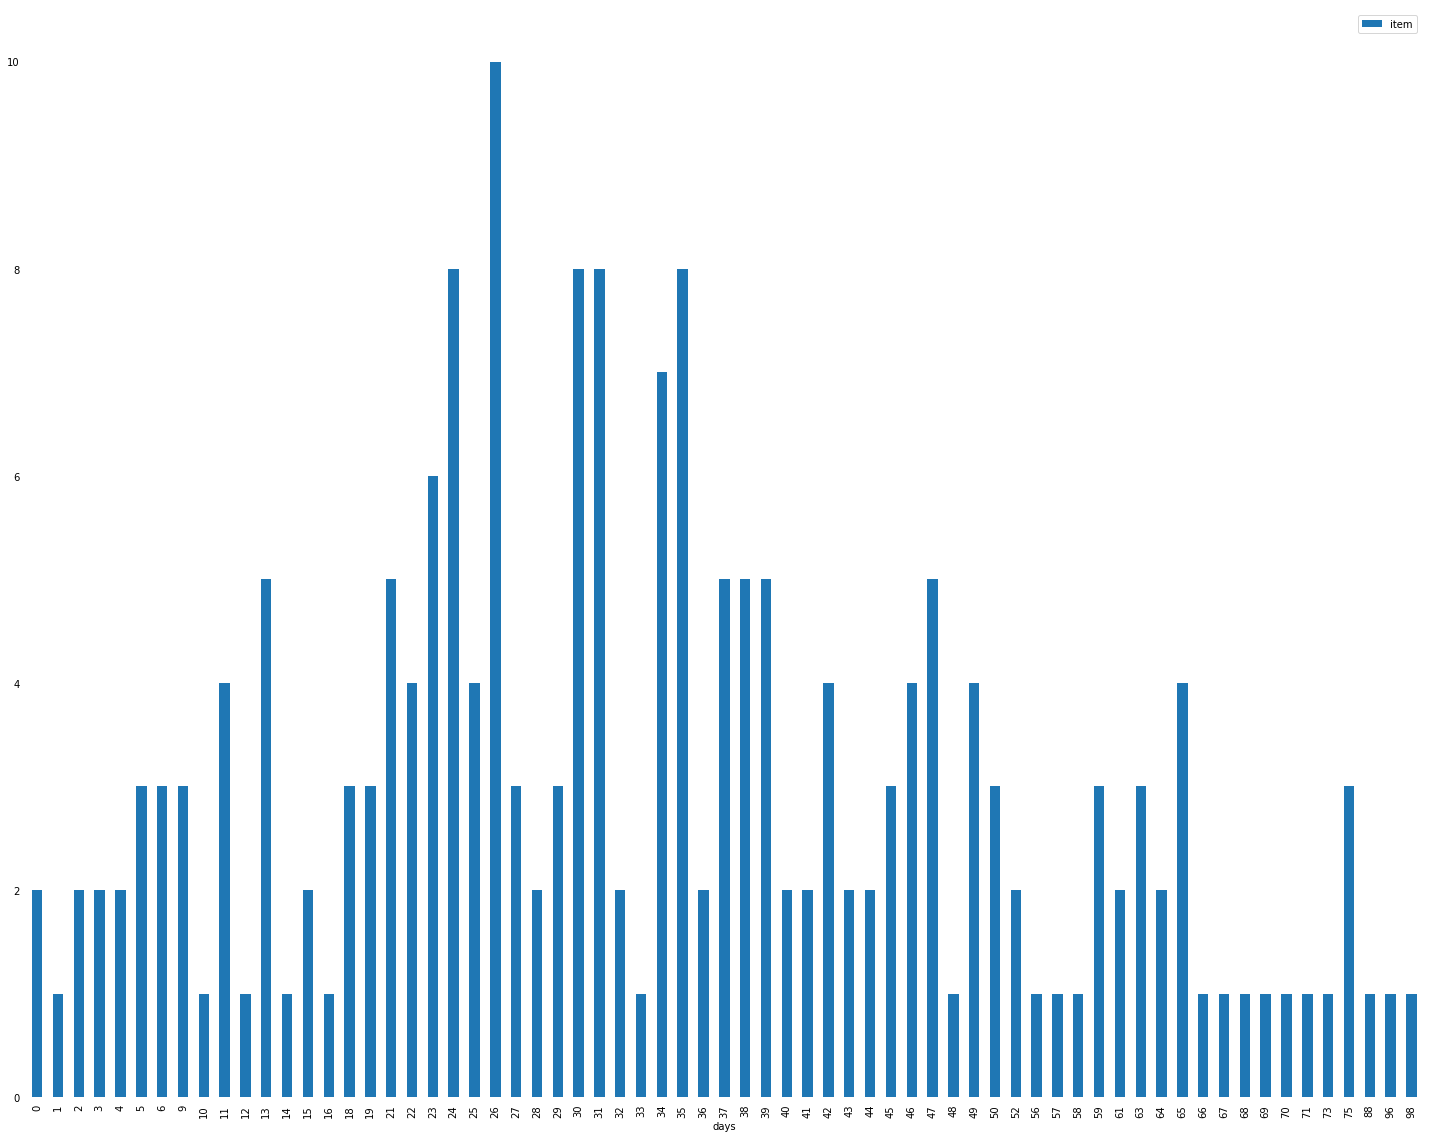

In [352]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

ax = days[days.days<100].plot(x='days',y='item',kind='bar',figsize=(25,20))
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    left= 'off')       # ticks along the top edge are off

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('time.pdf')

In [355]:
days = days[days.days<100]
days.to_csv('dot_plot_data.csv')